In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import glob as glob

In [2]:
def load_sample_data(country, city):
    directory = 'data/' + country + '/' + city + '/'
    csv_files = [file_name for file_name in glob.glob(directory + '*') if file_name[-4:] == '.csv']
    
    for file_loc in csv_files:
        file_name = file_loc.split('/')[3]
        
        if file_name == 'listings_sample.csv':
            #Read Listing Sample
            listing_sample = pd.read_csv(file_loc)
            
        elif file_name == 'reviews_sample.csv':
            #Read Review Sample
            reviews_sample = pd.read_csv(file_loc)
            
        elif file_name == 'neighbourhoods_sample.csv':
            #Read Neighborhoods
            neighbourhoods_sample = pd.read_csv(file_loc)
            
    return [listing_sample, reviews_sample, neighbourhoods_sample]


def load_full_data(country, city):
    directory = 'data/' + country + '/' + city + '/'
    csv_files = [file_name for file_name in glob.glob(directory + '*') if file_name[-4:] == '.csv']
    
    for file_loc in csv_files:
        file_name = file_loc.split('/')[3]
        
        if file_name == 'listings_full.csv':
            #Read Listings
            listings_full = pd.read_csv(file_loc).drop(columns=['Unnamed: 0'])
            
        elif file_name == 'reviews_full.csv':
            #Read Reviews
            reviews_full = pd.read_csv(file_loc).drop(columns=['Unnamed: 0'])
            
        elif file_name == 'calendar_full.csv':
            #Read Calendar
            calendar_full = pd.read_csv(file_loc).drop(columns=['Unnamed: 0'])
            
    return [listings_full, reviews_full, calendar_full]

In [3]:
listings_sf = pd.read_csv('../sf/listings_detailed.csv')

In [4]:
def clean_listing_full(listing_full_data):
    """Cleans listing_full.csv data"""
    # Input Data
    df = listing_full_data
    
    # String to Datetime
    df['last_scraped'] = pd.to_datetime(df['last_scraped'])
    df['host_since'] = pd.to_datetime(df['host_since'])
    df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])
    df['first_review'] = pd.to_datetime(df['first_review'])
    df['last_review'] = pd.to_datetime(df['last_review'])
    
    # String to Numeric
    df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str[:-1]) / 100
    df['price'] = pd.to_numeric(df['price'].str[1:].str.replace(',',''))
    df['weekly_price'] = pd.to_numeric(df['weekly_price'].str[1:].str.replace(',',''))
    df['monthly_price'] = pd.to_numeric(df['monthly_price'].str[1:].str.replace(',',''))
    df['security_deposit'] = pd.to_numeric(df['security_deposit'].str[1:].str.replace(',',''))
    df['cleaning_fee'] = pd.to_numeric(df['cleaning_fee'].str[1:].str.replace(',',''))
    df['extra_people'] = pd.to_numeric(df['extra_people'].str[1:].str.replace(',',''))

    # t/f to Numeric
    df['host_is_superhost'] = (df['host_is_superhost'] == "t").astype(int)
    df['host_has_profile_pic'] = (df['host_has_profile_pic'] == "t").astype(int)
    df['host_identity_verified'] = (df['host_identity_verified'] == "t").astype(int)
    df['is_location_exact'] = (df['is_location_exact'] == "t").astype(int)
    df['has_availability'] = (df['has_availability'] == "t").astype(int)
    df['requires_license'] = (df['requires_license'] == "t").astype(int)
    df['instant_bookable'] = (df['instant_bookable'] == "t").astype(int)
    df['is_business_travel_ready'] = (df['is_business_travel_ready'] == "t").astype(int)
    df['require_guest_profile_picture'] = (df['require_guest_profile_picture'] == "t").astype(int)
    df['require_guest_phone_verification'] = (df['require_guest_phone_verification'] == "t").astype(int)
    
    return df

In [5]:
clean_listings_sf = clean_listing_full(listings_sf)

In [6]:
listings_detailed = clean_listings_sf.copy()

ID = list(listings_detailed.iloc[:,:2].columns)

ABOUT_COLS = list(listings_detailed.iloc[:,3:15].columns)

PICS_COLS = list(listings_detailed.iloc[:,15:19].columns)

HOST_COLS = list(listings_detailed.columns[listings_detailed.columns.str.contains('host')])

NEIGHBORHOOD_COLS = list(listings_detailed.columns[listings_detailed.columns.str.contains('neighbourhood')])

LOCATION_COLS = list(listings_detailed.iloc[:,37:51].columns)

PROPERTY_COLS = list(listings_detailed.iloc[:,51:60].columns)

PRICE_COLS = list(listings_detailed.iloc[:,60:67].columns)

NIGHTS_COLS = list(listings_detailed.columns[listings_detailed.columns.str.contains('mum')])

AVAILABILITY_COLS = list(listings_detailed.columns[listings_detailed.columns.str.contains('availability')])

REVIEW_COLS = list(listings_detailed.columns[listings_detailed.columns.str.contains('review')])

SCRAPING_COLS = ['scrape_id','calendar_updated','calendar_last_scraped']

ELSE_COLS = ['requires_license', 'license', 'jurisdiction_names', 'instant_bookable',\
             'is_business_travel_ready', 'cancellation_policy', 'require_guest_profile_picture',\
             'require_guest_phone_verification']

## Neighborhood Info

In [7]:
neighborhood_info = clean_listings_sf[ID + NEIGHBORHOOD_COLS + ABOUT_COLS]

In [8]:
neighborhood_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7198 entries, 0 to 7197
Data columns (total 18 columns):
id                              7198 non-null int64
listing_url                     7198 non-null object
host_neighbourhood              6559 non-null object
neighbourhood                   6660 non-null object
neighbourhood_cleansed          7198 non-null object
neighbourhood_group_cleansed    0 non-null float64
last_scraped                    7198 non-null datetime64[ns]
name                            7198 non-null object
summary                         7000 non-null object
space                           6109 non-null object
description                     7183 non-null object
experiences_offered             7198 non-null object
neighborhood_overview           5310 non-null object
notes                           4486 non-null object
transit                         5238 non-null object
access                          4794 non-null object
interaction                     4931 non

In [37]:
neighborhood_overviews = neighborhood_info[['id','neighbourhood_cleansed','neighborhood_overview']].dropna()

## Get POS

In [38]:
def get_pos_sentences(data):
    # Tokenize each sentence into words: token_sentences
    token_sentences = [nltk.word_tokenize(re.sub(r'[^\x00-\x7F]+',' ', sent)) for sent in data]

    # Tag each tokenized sentence into parts of speech: pos_sentences
    pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]
    return pos_sentences

In [39]:
# Initialize TextExtraction with DS Skills Listing
pos_overviews_neighborhood = get_pos_sentences(neighborhood_overviews['neighborhood_overview'])

## Non-NER

In [45]:
def get_name_entities(pos_sentences):
    """Return Name Entities List"""
    # Create the named entity chunks: chunked_sentences
    chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)
        
    # Chunk List per Listing
    listing_chunk_list = []

    # Test for stems of the tree with 'NE' tags
    for sent in chunked_sentences:
        chunks_list = []
        for chunk in sent:
            if hasattr(chunk, "label") and chunk.label() == "NE":
                chunks_list.append(chunk.leaves())

        #Append List of Chunks
        listing_chunk_list.append(chunks_list)
        
    # Chunks to List of Words
    listing_name_entity_list = [[' '.join([word[0] for word in chunk]) for chunk in chunk_list] for chunk_list in listing_chunk_list]
                
    return listing_name_entity_list

In [46]:
ner_overviews_neighborhood = get_name_entities(pos_overviews_neighborhood)

In [47]:
neighborhood_overviews = neighborhood_overviews.reset_index(drop=True)

In [48]:
neighborhood_overviews['name_entities'] = pd.Series(ner_overviews_neighborhood)

In [50]:
neighborhood_overviews.head()

,id,neighbourhood_cleansed,neighborhood_overview,name_entities
0,958,Western Addition,*Quiet cul de sac in friendly neighborhood *St...,[Recreational Center]
1,5858,Bernal Heights,I love how our neighborhood feels quiet but is...,"[Noe Valley, Bernal Heights]"
2,7918,Haight Ashbury,"Shopping old town, restaurants, McDonald, Whol...","[McDonald, Whole, Target]"
3,8567,Western Addition,"The neighborhood is very centrally located, cl...",[]
4,8739,Mission,Located between Valencia Street and Dolores Pa...,"[Valencia Street, Dolores Park, San Francisco,..."


## Delete Name Entities

In [51]:
def del_name_entities(row):
    name_entities = row.name_entities
    overview_w_ne = row.neighborhood_overview
    
    for ne in name_entities:
        overview_w_ne = overview_w_ne.replace(ne, '')
        
    return overview_w_ne

In [53]:
neighborhood_overviews['no_name_entities'] = neighborhood_overviews.apply(del_name_entities, 1)

## Clean & Tokenize Overview Text

In [54]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Get Stopwords
stop_words = set(stopwords.words('english'))

# Get Puncuations
punctuations = set(string.punctuation)

def clean_text(doc):
    
    # remove all ascii
    doc = re.sub(r'[^\x00-\x7F]+',' ', doc)

    # Tokenize, Lemmatize, and Remove Stopwords
    tokens = [lemmatizer.lemmatize(word).lower() for word in nltk.word_tokenize(doc) if word.lower() not in set(stop_words | punctuations)]
    
    return tokens

In [55]:
# Clean & Tokenize Overviews
neighborhood_overviews['no_ner_tokens'] = neighborhood_overviews['no_name_entities'].apply(clean_text)

# Count Tokens
neighborhood_overviews['no_ner_tokens_count'] = neighborhood_overviews['no_ner_tokens'].map(lambda x: len(x))

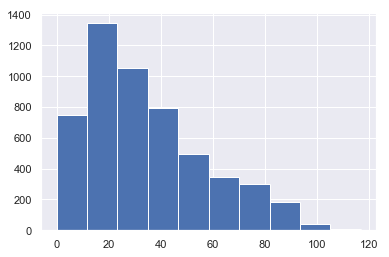

In [78]:
neighborhood_overviews['no_ner_tokens_count'].hist()

# Topic Modeling

In [56]:
token_texts = list(neighborhood_overviews['no_ner_tokens'].values)

In [80]:
from gensim.corpora.dictionary import Dictionary

# Create a corpus from a list of texts
common_dictionary = Dictionary(token_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in token_texts]

In [81]:
from gensim.models.ldamulticore import LdaMulticore
import time
ldam = LdaMulticore

num_topics = 50
num_words = 5
passes = 50

# Get Start Time
start_time = time.time()

# LDA Model
ldam_model = ldam(common_corpus, num_topics=num_topics, id2word=common_dictionary, passes=passes)
model_end_time = time.time() # Model End Time

# LDA Results
results = ldam_model.print_topics(num_topics=num_topics, num_words=num_words)
result_time = time.time() # Results Time

In [82]:
ldam_model.save('../models/ldam_neighborhood_overviews_5topics_5words_50passes_no_ners.model')

In [83]:
def display_results(results):
    for index, results in results:
        print(str(index) + ': ' + str(', '.join(results.split('"')[1::2])))

In [87]:
display_results(results)

0: walk, min, minute, 5, 10
1: night, life, restaurant, mission, neighborhood
2: area, park, home, family, shop
3: easy, access, neighborhood, freeway, 101
4: street, gate, great, golden, neighborhood
5: view, neighborhood, located, city, area
6: location, 4th, grab, high, street
7: 's, city, explore, urban, district
8: 's, city, walking, location, distance
9: movie, restaurant, bar, theater, neighborhood
10: neighborhood, 's, safe, quiet, one
11: 's, homeless, people, neighborhood, street
12: restaurant, shop, neighborhood, store, grocery
13: neighborhood, great, restaurant, one, place
14: food, office, post, great, view
15: neighborhood, garden, one, park, -ashbury
16: street, neighborhood, parking, block, mile
17: walk, minute, block, restaurant, away
18: city, one, 's, park, best
19: 's, coffee, market, shop, pizza
20: mi, 24th, ask, home, restaurant
21: restaurant, neighborhood, shop, mission, bar
22: block, street, best, restaurant, one
23: neighborhood, sunday, food, fresh, morn

In [85]:
def display_results_no_duplicates(results):
    all_lists = []
    for index, result in results:
        all_lists = all_lists + result.split('"')[1::2]
    
    # Get Counts of each word
    counts = pd.Series(all_lists).value_counts()
    no_duplicates = counts[counts == 1].index
    
    for index, result in results:
        print(str(index) + ': ' + str(', '.join([word for word in result.split('"')[1::2] if word in no_duplicates])))

In [86]:
display_results_no_duplicates(results)

0: min, 5, 10
1: night, life
2: family
3: freeway, 101
4: gate, golden
5: 
6: 4th, grab, high
7: explore, urban
8: 
9: movie, theater
10: safe, quiet
11: homeless, people
12: grocery
13: place
14: office, post
15: garden, -ashbury
16: mile
17: 
18: 
19: market, pizza
20: mi, 24th, ask
21: 
22: 
23: sunday, fresh, morning
24: public
25: 
26: school
27: 
28: museum, art, young, visit
29: 
30: number
31: along
32: 
33: head, centrally, nightlife
34: 
35: car, nearby, attraction
36: close, everything
37: many
38: hidden, cafe
39: --
40: perfect, center
41: apartment
42: 
43: offer, plenty
44: near
45: door, right, front, next
46: valley
47: bus, take, line, stop
48: course, trail, beach, hiking, golf
49: ``


# By Neighborhood

In [61]:
tokens_by_neighborhood = neighborhood_overviews.groupby('neighbourhood_cleansed')[['no_ner_tokens']].apply(sum)

# Topic Modeling

In [62]:
token_texts_by_neighborhood = list(tokens_by_neighborhood['no_ner_tokens'].values)

In [63]:
from gensim.corpora.dictionary import Dictionary

# Create a corpus from a list of texts
common_dictionary_by_neighborhood = Dictionary(token_texts_by_neighborhood)
common_corpus_by_neighborhood = [common_dictionary_by_neighborhood.doc2bow(text) for text in token_texts_by_neighborhood]

In [64]:
from gensim.models.ldamulticore import LdaMulticore
import time
ldam = LdaMulticore

num_topics = 50
num_words = 10
passes = 50

# Get Start Time
start_time = time.time()

# LDA Model
ldam_model_by_neighborhood = ldam(common_corpus_by_neighborhood, num_topics=num_topics, id2word=common_dictionary_by_neighborhood, passes=passes)
model_end_time = time.time() # Model End Time

# LDA Results
results_by_neighborhood = ldam_model_by_neighborhood.print_topics(num_topics=num_topics, num_words=num_words)
result_time = time.time() # Results Time

In [65]:
display_results(results_by_neighborhood)

0: neighborhood, 's, block, restaurant, walk, city, minute, shop, away, street
1: restaurant, neighborhood, 's, city, walk, block, shop, away, distance, within
2: restaurant, 's, neighborhood, block, street, walk, bar, walking, great, shop
3: neighborhood, 's, restaurant, block, walk, away, street, shop, city, bar
4: neighborhood, block, restaurant, 's, walk, one, park, shop, away, also
5: restaurant, neighborhood, 's, away, block, city, walking, street, shop, many
6: 's, neighborhood, block, restaurant, shop, city, great, away, walk, within
7: neighborhood, restaurant, 's, street, away, city, walk, walking, block, shop
8: neighborhood, restaurant, 's, walk, block, shop, street, city, one, away
9: min, downtown, bank, 15, sf, crocker-amazon, traffic, line, laundromat, safe
10: restaurant, neighborhood, 's, great, walk, walking, block, street, bar, within
11: restaurant, neighborhood, block, 's, city, away, street, shop, walk, distance
12: 's, district, block, city, financial, explore, 